### Computer Vision and Deep Learning 
## Lab 4 - Deep Learning Architectures
This lab looks into using deep learning for the purpose of image classification and region proposal. We will also utilise RNN architectures to learn temporal information.

## Imports <a id="imports"></a>
The following section defines the imports used for the rest of the notebook.

In [1]:
# For ndarray handling:
import numpy as np

# For plotting:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# For deep learning functionality
import tensorflow as tf
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPool2D
from tensorflow.python.keras.layers import SimpleRNN, LSTM

## Load the MNIST digit recognition dataset
This dataset is comprised of ~70,000 28x28 grayscale images of handwritten numerical digits 0-9. It is a common baseline dataset used in the evaluation of many recognition methodologies.

<IPython.core.display.Javascript object>


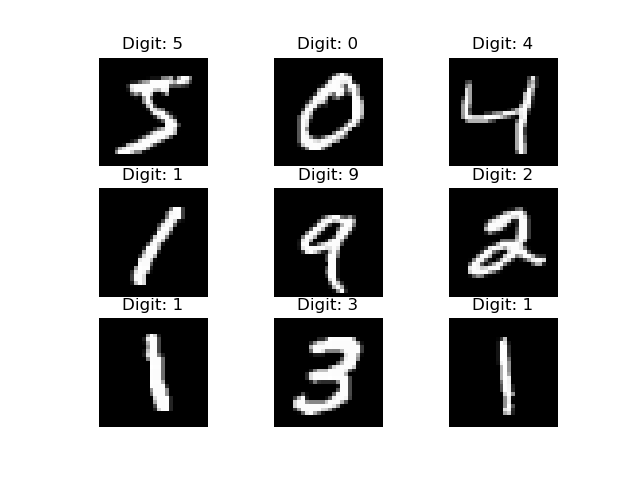

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Get the one-hot encoded labels
n_class = len(np.unique(y_train))
Y_train = np.eye(n_class)[y_train]
Y_test = np.eye(n_class)[y_test]

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.axis('off')

***

<center><H1> Neural Network </H1></center>

***

## Using a Neural Network
Here we will use a normal neural network architecture, one which does not explicitly utilize the spatial topology of the input domain (i.e. the 2D that images reside on).

In [3]:
# Turn our images into 1D vectors by unravelling them
X_train_NN = X_train.reshape(X_train.shape[0], 784)
X_test_NN = X_test.reshape(X_test.shape[0], 784)
X_train_NN = X_train_NN.astype('float32')
X_test_NN = X_test_NN.astype('float32')

# Normalize the data to help with training
X_train_NN /= 255
X_test_NN /= 255

# Create the model using Sequential object
model = Sequential()

# Create the first hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(Dense(512, input_shape=(X_train_NN.shape[1], )))
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the next hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(Dense(512))
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model ready for training
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_NN, Y_train, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 41s 850us/sample - loss: 0.2355 - accuracy: 0.9276 - val_loss: 0.1290 - val_accuracy: 0.9613
Epoch 2/10
48000/48000 [==============================] - 39s 811us/sample - loss: 0.1129 - accuracy: 0.9658 - val_loss: 0.1033 - val_accuracy: 0.9697
Epoch 3/10
48000/48000 [==============================] - 39s 805us/sample - loss: 0.0858 - accuracy: 0.9736 - val_loss: 0.1041 - val_accuracy: 0.9678
Epoch 4/10
48000/48000 [==============================] - 40s 823us/sample - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0819 - val_accuracy: 0.9764
Epoch 5/10
48000/48000 [==============================] - 41s 852us/sample - loss: 0.0572 - accuracy: 0.9818 - val_loss: 0.0852 - val_accuracy: 0.9771
Epoch 6/10
48000/48000 [==============================] - 39s 809us/sample - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.1023 - val_accuracy: 0.9748
Epoch 7/10
48000/48000 [====================

## Plot the training statistics.

<IPython.core.display.Javascript object>


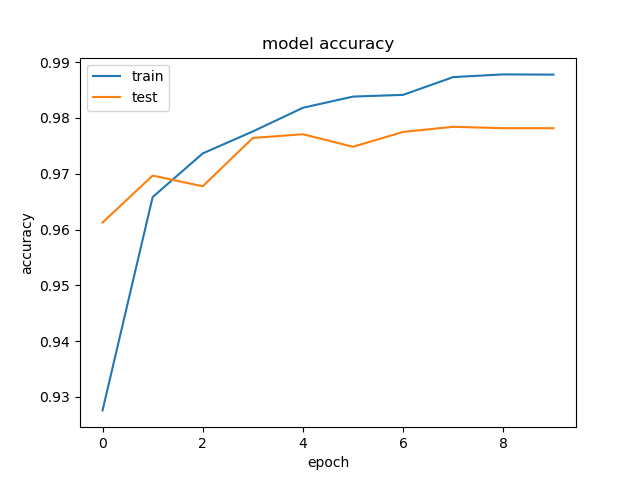

<IPython.core.display.Javascript object>


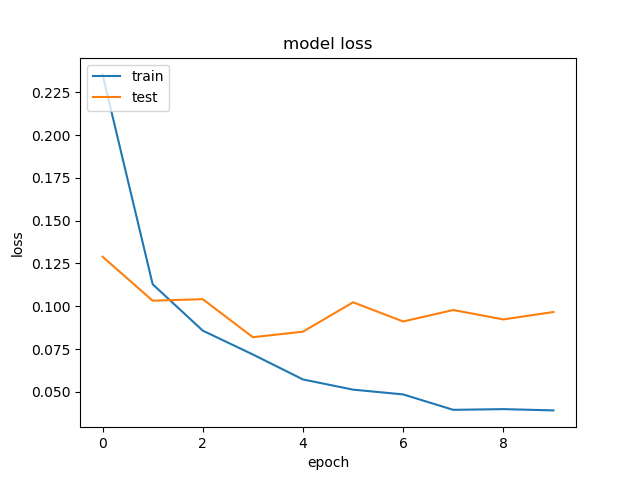

In [5]:
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluate our Neural Network
Here we will predict the class probability for each test sample. We can then compare this to our ground truth and see the performance of our model on the testing set.

In [7]:
predicted_probability = model.predict(X_test_NN)

predicted_class = predicted_classes = model.predict_classes(X_test_NN)

correct_preds = np.nonzero(predicted_classes == y_test)[0]
incorrect_preds = np.nonzero(predicted_classes != y_test)[0]
print("{0} classified correctly".format(len(correct_preds)))
print("{0} classified incorrectly".format(len(incorrect_preds)))
print("{0:.2f}% of test set classified correctly".format(len(correct_preds) / len(y_test) * 100))

9788 classified correctly
212 classified incorrectly
97.88% of test set classified correctly


Correctly classified:


<IPython.core.display.Javascript object>


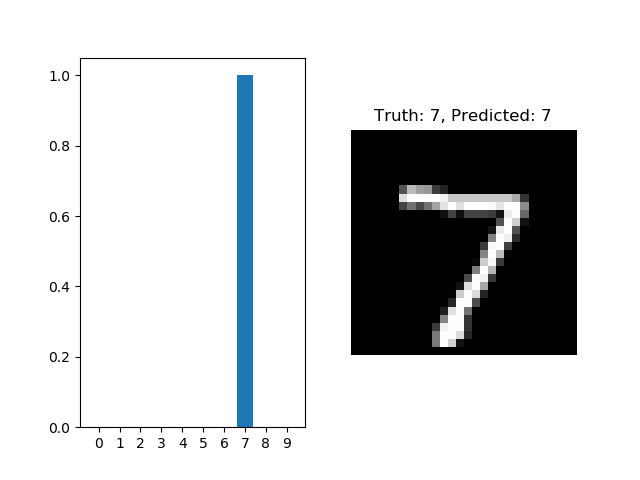

<IPython.core.display.Javascript object>


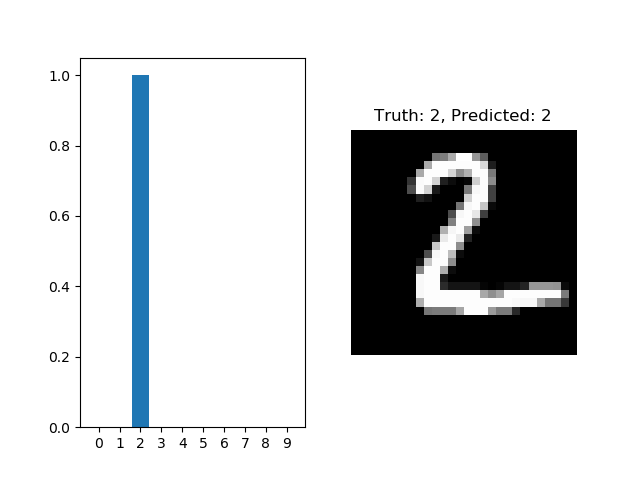

<IPython.core.display.Javascript object>


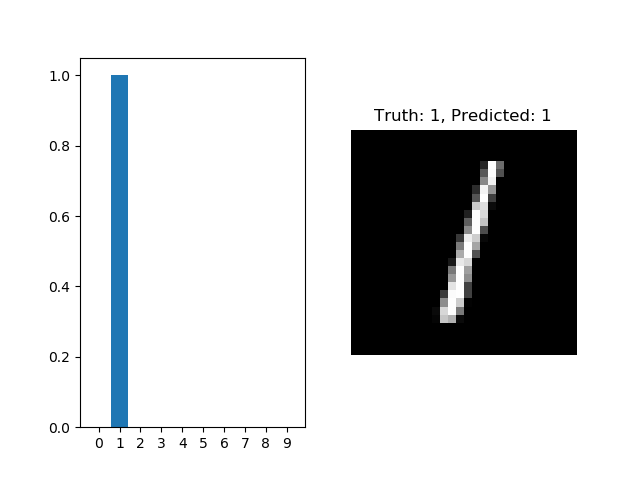

<IPython.core.display.Javascript object>


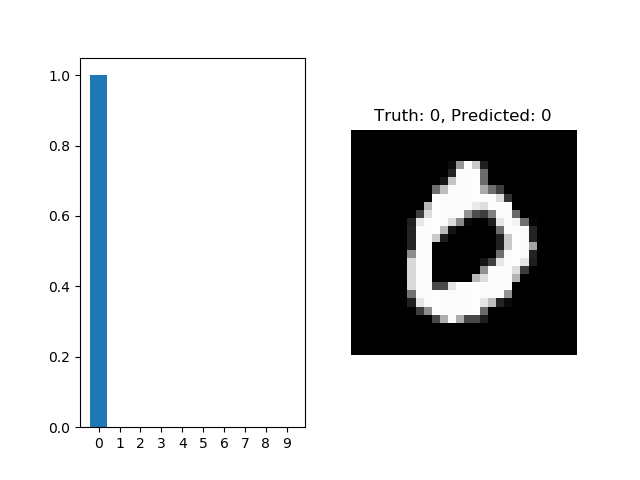

<IPython.core.display.Javascript object>


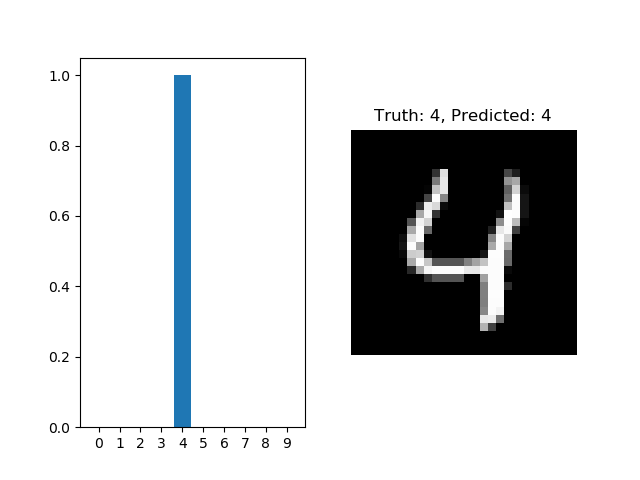

Incorrectly classified:


<IPython.core.display.Javascript object>


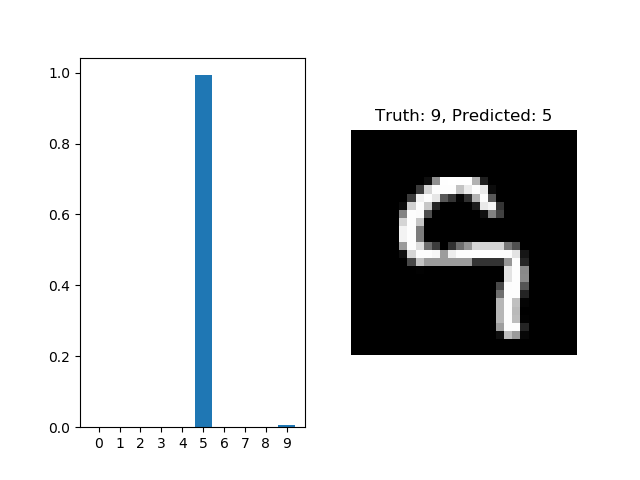

<IPython.core.display.Javascript object>


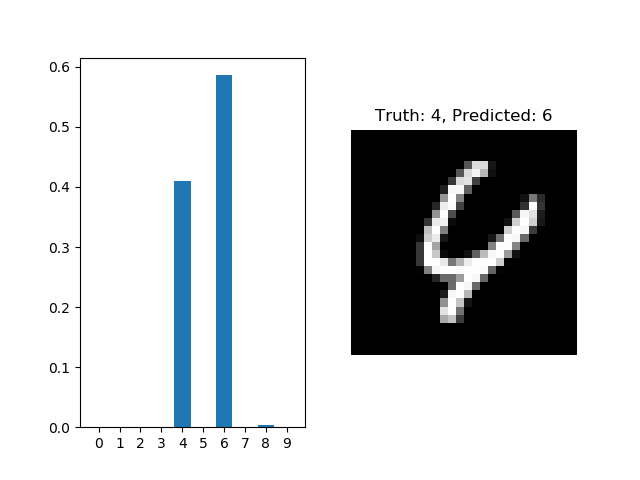

<IPython.core.display.Javascript object>


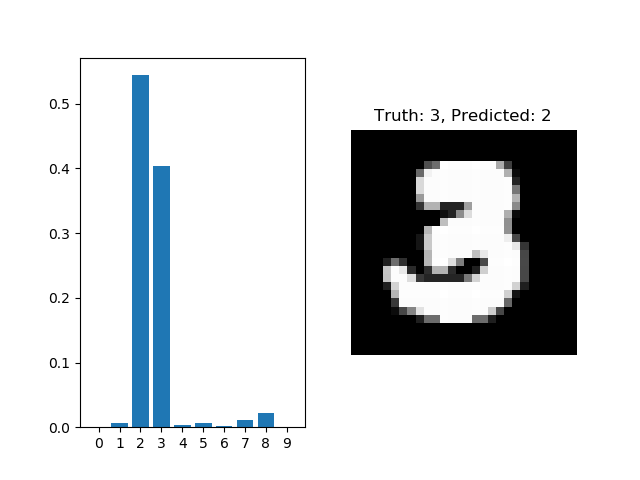

<IPython.core.display.Javascript object>


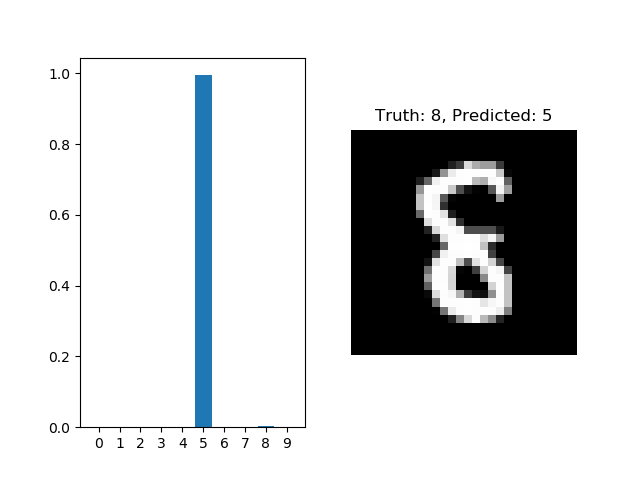

<IPython.core.display.Javascript object>


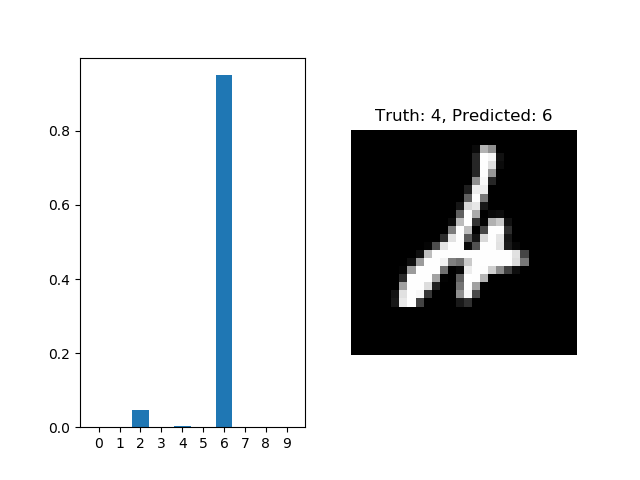

In [8]:
print('Correctly classified:')
for i_correct in correct_preds[0:5]:
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.bar(range(n_class), predicted_probability[i_correct], tick_label=range(n_class))
    plt.subplot(1, 2, 2)
    plt.imshow(X_test[i_correct], cmap='gray', interpolation='none')
    plt.title("Truth: {}, Predicted: {}".format(y_test[i_correct], predicted_class[i_correct]))
    plt.axis('off')
    
print('Incorrectly classified:')
for i_incorrect in incorrect_preds[0:5]:
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.bar(range(n_class), predicted_probability[i_incorrect], tick_label=range(n_class))
    plt.subplot(1, 2, 2)
    plt.imshow(X_test[i_incorrect], cmap='gray', interpolation='none')
    plt.title("Truth: {}, Predicted: {}".format(y_test[i_incorrect], predicted_class[i_incorrect]))
    plt.axis('off')

***

<center><H1> Convolutional Neural Network </H1></center>

***

## Using a Convolutional Neural Network
Here we will use a convolutional neural network architecture, one which does explicitly utilize the spatial topology of the input domain (i.e. the 2D that images reside on).

In [9]:
# Normalize the data to help with training
X_train_CNN = np.expand_dims(X_train, axis=-1)
X_test_CNN = np.expand_dims(X_test, axis=-1)
X_train_CNN = X_train_CNN.astype('float32')
X_test_CNN = X_test_CNN.astype('float32')
X_train_CNN /= 255
X_test_CNN /= 255

# Create the model using Sequential object
model = Sequential()

# Create the first hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(Conv2D(10, (5, 5), input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2], 1)))
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the next hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(MaxPool2D())
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the dense head layer
model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))

# Create the output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model ready for training
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_CNN, Y_train, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 68s 1ms/sample - loss: 0.2675 - accuracy: 0.9199 - val_loss: 0.1164 - val_accuracy: 0.9697
Epoch 2/10
48000/48000 [==============================] - 64s 1ms/sample - loss: 0.1033 - accuracy: 0.9680 - val_loss: 0.0864 - val_accuracy: 0.9753
Epoch 3/10
48000/48000 [==============================] - 60s 1ms/sample - loss: 0.0777 - accuracy: 0.9752 - val_loss: 0.0602 - val_accuracy: 0.9826
Epoch 4/10
48000/48000 [==============================] - 61s 1ms/sample - loss: 0.0627 - accuracy: 0.9801 - val_loss: 0.0627 - val_accuracy: 0.9827
Epoch 5/10
48000/48000 [==============================] - 59s 1ms/sample - loss: 0.0539 - accuracy: 0.9835 - val_loss: 0.0514 - val_accuracy: 0.9837
Epoch 6/10
48000/48000 [==============================] - 58s 1ms/sample - loss: 0.0461 - accuracy: 0.9846 - val_loss: 0.0462 - val_accuracy: 0.9862
Epoch 7/10
48000/48000 [==============================] 

In [10]:
predicted_probability = model.predict(X_test_CNN)

predicted_class = predicted_classes = model.predict_classes(X_test_CNN)

correct_preds = np.nonzero(predicted_classes == y_test)[0]
incorrect_preds = np.nonzero(predicted_classes != y_test)[0]
print("{0} classified correctly".format(len(correct_preds)))
print("{0} classified incorrectly".format(len(incorrect_preds)))
print("{0:.2f}% of test set classified correctly".format(len(correct_preds) / len(y_test) * 100))

9888 classified correctly
112 classified incorrectly
98.88% of test set classified correctly


***

<center><H1> Recurrent Neural Network </H1></center>

***

# Using an RNN or LSTM
Often we can observe data which exhibits some temporal pattern, for example in time-series data such as the reccurance of flu cases, the flight pattern of birds, and even the usage of words in sentences. Such information may have features which are related to eachother over long and/short time periods. In these cases it can often be useful to utilize the temporal domain of the information and incorporate this into our model training scheme. Such models are known as Recurrent Neural Networks, of which there are many flavours and approaches.

In this section we will use the MNIST dataset again, but this time reading each row of the image in as a time-step. This replicates the behaviour of a line scanner, where each row is read one-by-one.

In [11]:
# Normalize the data to help with training
X_train_RNN = X_train
X_test_RNN = X_test
X_train_RNN = X_train_RNN.astype('float32')
X_test_RNN = X_test_RNN.astype('float32')
X_train_RNN /= 255
X_test_RNN /= 255

# Create the model using Sequential object
model = Sequential()

# Create the first hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(SimpleRNN(64))
model.add(Activation('tanh'))                         
model.add(Dropout(0.2))

# Create the output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model ready for training
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_RNN, Y_train, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 39s 805us/sample - loss: 0.6653 - accuracy: 0.7963 - val_loss: 0.3408 - val_accuracy: 0.9011
Epoch 2/10
48000/48000 [==============================] - 34s 705us/sample - loss: 0.3394 - accuracy: 0.9036 - val_loss: 0.2593 - val_accuracy: 0.9244
Epoch 3/10
48000/48000 [==============================] - 33s 695us/sample - loss: 0.2806 - accuracy: 0.9200 - val_loss: 0.2207 - val_accuracy: 0.9374
Epoch 4/10
48000/48000 [==============================] - 34s 715us/sample - loss: 0.2491 - accuracy: 0.9299 - val_loss: 0.1782 - val_accuracy: 0.9474
Epoch 5/10
48000/48000 [==============================] - 34s 706us/sample - loss: 0.2313 - accuracy: 0.9366 - val_loss: 0.2082 - val_accuracy: 0.9405
Epoch 6/10
48000/48000 [==============================] - 33s 693us/sample - loss: 0.2100 - accuracy: 0.9427 - val_loss: 0.2048 - val_accuracy: 0.9415
Epoch 7/10
48000/48000 [====================

In [12]:
predicted_probability = model.predict(X_test_RNN)

predicted_class = predicted_classes = model.predict_classes(X_test_RNN)

correct_preds = np.nonzero(predicted_classes == y_test)[0]
incorrect_preds = np.nonzero(predicted_classes != y_test)[0]
print("{0} classified correctly".format(len(correct_preds)))
print("{0} classified incorrectly".format(len(incorrect_preds)))
print("{0:.2f}% of test set classified correctly".format(len(correct_preds) / len(y_test) * 100))

9488 classified correctly
512 classified incorrectly
94.88% of test set classified correctly


***

<center><H1> LSTM </H1></center>

***

In [13]:
# Normalize the data to help with training
X_train_LSTM = X_train
X_test_LSTM = X_test
X_train_LSTM = X_train_LSTM.astype('float32')
X_test_LSTM = X_test_LSTM.astype('float32')
X_train_LSTM /= 255
X_test_LSTM /= 255

# Create the model using Sequential object
model = Sequential()

# Create the first hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(LSTM(64))
model.add(Activation('tanh'))                         
model.add(Dropout(0.2))

# Create the output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model ready for training
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_RNN, Y_train, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 124s 3ms/sample - loss: 0.5491 - accuracy: 0.8248 - val_loss: 0.2202 - val_accuracy: 0.9341
Epoch 2/10
48000/48000 [==============================] - 103s 2ms/sample - loss: 0.1813 - accuracy: 0.9489 - val_loss: 0.1296 - val_accuracy: 0.9645
Epoch 3/10
48000/48000 [==============================] - 105s 2ms/sample - loss: 0.1259 - accuracy: 0.9636 - val_loss: 0.1171 - val_accuracy: 0.9664
Epoch 4/10
48000/48000 [==============================] - 108s 2ms/sample - loss: 0.0984 - accuracy: 0.9723 - val_loss: 0.0901 - val_accuracy: 0.9750
Epoch 5/10
48000/48000 [==============================] - 99s 2ms/sample - loss: 0.0829 - accuracy: 0.9758 - val_loss: 0.0833 - val_accuracy: 0.9756
Epoch 6/10
48000/48000 [==============================] - 111s 2ms/sample - loss: 0.0743 - accuracy: 0.9779 - val_loss: 0.0674 - val_accuracy: 0.9817
Epoch 7/10
48000/48000 [===========================

<IPython.core.display.Javascript object>


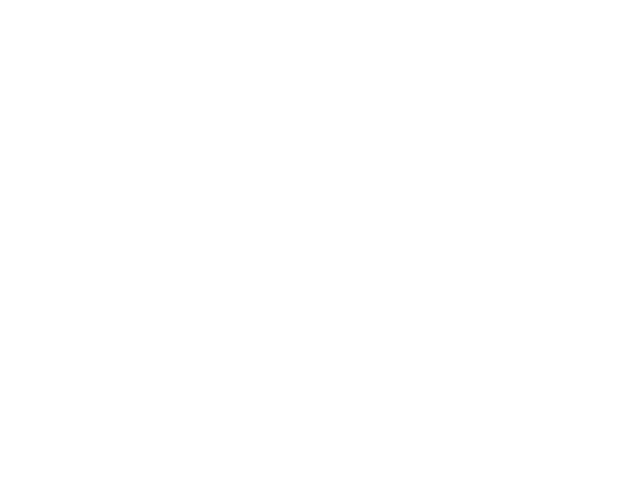

KeyError: 'acc'

In [14]:
# Summarize history for accuracy
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predicted_probability = model.predict(X_test_LSTM)

predicted_class = predicted_classes = model.predict_classes(X_test_LSTM)

correct_preds = np.nonzero(predicted_classes == y_test)[0]
incorrect_preds = np.nonzero(predicted_classes != y_test)[0]
print("{0} classified correctly".format(len(correct_preds)))
print("{0} classified incorrectly".format(len(incorrect_preds)))
print("{0:.2f}% of test set classified correctly".format(len(correct_preds) / len(y_test) * 100))

***

<center><H1> Region Proposal Networks </H1></center>

***

# Using an RCNN
So far we have trained networks for the classification task, where it is assumed that our object of interest takes up a respectable portion of the observed input. Note that all of the MNIST images contain only one digit, that digit is centred and appropriately scaled and all of them are light digits on a dark background.

In reality we often come across the detection problem, where we wish to both identify and localize our objects in our observations. Think of the face detection problem, we can often see images containing numerous faces at various scales and orientations. There are numerous methods for tackling this problem, but a common niave approach is to perform a sliding window search across the input space, taking localised patches and passing them to a classification model. Depending on the size of the input domain and the sliding operation we perform, this can be a very expensive task which leads to high time complexity.

Region Proposal Networks attempt to overcome the issue of large search space traversal by first obtaining regions of interest within the whole input image. These regions of interest can then act as focal points for our classifier to then identify the object.

For this task we will modify our MNIST dataset to create larger images within which we have placed our digits. We will then utilise an RCNN pipeline to first identify proposed regions of interest within our scene. We will then use a pre-trained CNN to classify these regions.

In [ ]:
# First we will create a new dataset in which we have MNIST images placed in random places within a larger image.

# Create new dataset of images which are 640×480
mnist_size = X_train.shape

X_train_RPN = np.zeros([mnist_size[0] // 100, 160, 240])
X_test_RPN = np.zeros([mnist_size[0] // 100, 160, 240])

# Next we will place digits in random XY locations within the larger image space. 
# To do this we will first get random coordinates, we will then create the bounding box ground truth and then write 
# the MNIST sample into our larger images. 

# Training Set:
train_xs = np.random.randint(mnist_size[1], X_train_RPN.shape[1] - mnist_size[1], X_train_RPN.shape[0])
train_ys = np.random.randint(mnist_size[2], X_train_RPN.shape[2] - mnist_size[2], X_train_RPN.shape[0])
train_bbox = np.stack([train_xs - mnist_size[1] // 2, train_ys - mnist_size[2] // 2,
                       train_xs + mnist_size[1] // 2, train_ys + mnist_size[2] // 2], axis=1)

for i_train in range(X_train_RPN.shape[0]):
    X_train_RPN[i_train, train_bbox[i_train, 0]:train_bbox[i_train, 2], \
                         train_bbox[i_train, 1]:train_bbox[i_train, 3]] = X_train[i_train, :, :]

# Testing Set:    
test_xs = np.random.randint(mnist_size[1], X_test_RPN.shape[1] - mnist_size[1], X_test_RPN.shape[0])
test_ys = np.random.randint(mnist_size[2], X_test_RPN.shape[2] - mnist_size[2], X_test_RPN.shape[0])
test_bbox = np.stack([test_xs - mnist_size[1] // 2, test_ys - mnist_size[2] // 2,
                      test_xs + mnist_size[1] // 2, test_ys + mnist_size[2] // 2], axis=1)
    
for i_test in range(X_train_RPN.shape[0]):
    X_test_RPN[i_test, test_bbox[i_test, 0]:test_bbox[i_test, 2], \
                        test_bbox[i_test, 1]:test_bbox[i_test, 3]] = X_test[i_test, :, :]

In [ ]:
# We can visualise our new bigger images with truth bounding boxes.
for i in range(5):
    plt.figure()
    ax = plt.imshow(X_train_RPN[i]).axes
    ax.add_patch(matplotlib.patches.Rectangle(train_bbox[i, 0:2][::-1], 28, 28, fill=False, color='r'))

In [ ]:
# Train a CNN on normal MNIST (28x28) with background class aswell.
# Add background class to mnist dataset.
n_empty_bg = 600
n_random_bg = 100
X_train_with_bg = np.concatenate([X_train, 
                                  np.zeros([n_empty_bg, X_train.shape[1], X_train.shape[2]]), 
                                  np.random.rand(n_random_bg, X_train.shape[1], X_train.shape[2])])
Y_train_with_bg = np.concatenate([np.c_[Y_train, np.zeros([Y_train.shape[0],1])],
                                  np.eye(n_class + 1)[np.zeros(n_empty_bg + n_random_bg, dtype=np.int) + n_class]])
X_test_with_bg = X_test
Y_test_with_bg = Y_test

# Randomly shuffle our data, so that the background class gets mixed into the set.
train_shuffle = np.arange(X_train_with_bg.shape[0])
np.random.shuffle(train_shuffle)
X_train_with_bg = X_train_with_bg[train_shuffle]
Y_train_with_bg = Y_train_with_bg[train_shuffle]

test_shuffle = np.arange(X_test_with_bg.shape[0])
np.random.shuffle(test_shuffle)
X_test_with_bg = X_test_with_bg[test_shuffle]
Y_test_with_bg = Y_test_with_bg[test_shuffle]

# Normalize the sets.
X_train_CNN = np.expand_dims(X_train_with_bg, axis=-1)
X_test_CNN = np.expand_dims(X_test_with_bg, axis=-1)
X_train_CNN = X_train_CNN.astype('float32')
X_test_CNN = X_test_CNN.astype('float32')
X_train_CNN = X_train_CNN / 255
X_test_CNN = X_test_CNN / 255

In [ ]:
print(X_train_CNN.shape)
print(Y_train_with_bg.shape)

In [ ]:
# Train our CNN to classify digits and background observations

# Create the model using Sequential object
model = Sequential()

# Create the first hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(Conv2D(10, (3, 3), padding='same', input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2], 1)))
model.add(Conv2D(10, (3, 3), padding='same'))
model.add(MaxPool2D())
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the next hidden layer
model.add(Conv2D(10, (3, 3), padding='same'))
model.add(Conv2D(10, (3, 3), padding='same'))
model.add(MaxPool2D())
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the next hidden layer
model.add(Conv2D(10, (3, 3), padding='same'))
model.add(Conv2D(10, (3, 3), padding='same'))
model.add(MaxPool2D())
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the dense head layer
model.add(Flatten())
model.add(Dense(50))
model.add(Activation('sigmoid'))

# Create the output layer
model.add(Dense(n_class+1))
model.add(Activation('softmax'))

# Compile the model ready for training
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_CNN, Y_train_with_bg, epochs=50, validation_split=0.2)

In [ ]:
# Summarize history for accuracy
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Sliding window approach

In [ ]:
# We can now try windowing across the whole image to see if there is a digit present at each location
# We will just do this with one image at the moment, to save time

print("We will visit {0} pixels using sliding window!".format(np.size(X_train_RPN[0])))

# Loop through images
for i_image in range(1):
    
    # Pad image to allow patch extraction
    pad_size = [s // 2 for s in X_train.shape[1:3]]
    padded_image = np.pad(X_test_RPN[i_image], pad_size, 'constant', constant_values=(0))

    # Loop through pixels and extract patches
    patches = []
    patch_counter = 0
    for i_row in range(pad_size[0], X_train_RPN.shape[1] + pad_size[1]):
        for i_col in range(pad_size[1], X_train_RPN.shape[2] + pad_size[0]):
            patches.append(padded_image[i_row - pad_size[0]:i_row + pad_size[0], \
                                        i_col - pad_size[1]:i_col + pad_size[1]])
            print("Patch {0}".format(patch_counter), end='\r')
            patch_counter += 1
            
    patches = np.expand_dims(np.asarray(patches), axis=-1)    
    patch_probabilities = model.predict_proba(patches)

predicted_segmentation = np.reshape(patch_probabilities, [X_test_RPN[i_image].shape[0], X_test_RPN[i_image].shape[1], n_class+1])
plt.figure()
plt.title("Input image")
plt.imshow(X_test_RPN[i_image])
for i_class in range(n_class + 1): 
    plt.figure()
    plt.title("Segmentation for class {0}".format(i_class))
    plt.imshow(predicted_segmentation[:, :, i_class])

## Selective Search + CNN detector
Here we will utilise selective search to first obtain some regions of interest in our image. We will then use these proposed regions as inputs to our classifier in order to obtain a label for each region.

In [ ]:
# Some additional imports which may be needed for the process
import selectivesearch # for selective search
import skimage # to reshape the proposals
import cv2 # to convert grayscale to color

# Loop over images and use selective search to identify proposals for objects in the scene
proposal = []
for i_img in range(1):
    proposal.append([])
    color_img = cv2.cvtColor(X_test_RPN[i_img].astype(np.float32),cv2.COLOR_GRAY2RGB)
    img_lbl, regions = selectivesearch.selective_search(color_img, scale=500, sigma=0.9, min_size=100)

    # Plot the image and overlay the proposals
    plt.figure()
    plt.title("Image: {0}".format(i_img))
    ax = plt.imshow(X_test_RPN[i_img]).axes
    for i in range(len(regions)):
        
        # add bounding box to image
        ax.add_patch(matplotlib.patches.Rectangle((regions[i]['rect'][0], regions[i]['rect'][1]),
                                                   regions[i]['rect'][2], regions[i]['rect'][3],
                                                   fill=False, color='r'))
        
        # Extract proposed region and store
        proposal[-1].append(X_test_RPN[i_img][regions[i]['rect'][1]:regions[i]['rect'][1] + regions[i]['rect'][3],
                                regions[i]['rect'][0]:regions[i]['rect'][0] + regions[i]['rect'][2]])
        
        # Reshape the proposal for classification by our CNN 
        proposal[-1][-1] = skimage.transform.resize(proposal[-1][-1], (28, 28))
        
        # Classify as [0-9] or background class. (double expand_dims to correct dimension for CNN [SxHxWxC])
        prediction = model.predict_proba(np.expand_dims(np.expand_dims(proposal[-1][-1], axis=0), axis=-1))
        
        # Plot the proposed region and it's predicted classes based on the CNN model.
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.title('Predicted: {0}, Truth: {1}'.format(np.argmax(prediction), np.argmax(Y_test[i_img])))
        plt.imshow(skimage.transform.resize(proposal[-1][-1], (28, 28)))
        plt.subplot(1, 2, 2)
        plt.plot(np.arange(n_class+1), np.squeeze(prediction))